In [586]:
# TensorFlow ≥2.0 is required
import tensorflow as tf


# Common imports
import pandas as pd
import numpy as np
import os
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


In [587]:
np.random.seed(42)

In [588]:
from tensorflow import keras

In [589]:
Df = pd.read_csv("/Users/mac/Downloads/Train.csv")

In [590]:
# 2014
Df4 = Df.iloc[:,4:11]

# 2015
Df5 = Df.iloc[:,11:21]
# 2019 
Df9 = Df.iloc[:,21:38]

<Figure size 360x360 with 0 Axes>

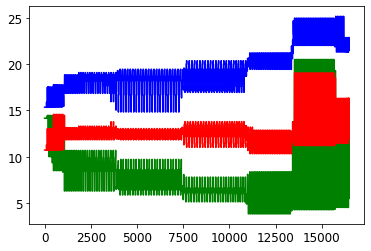

<Figure size 360x360 with 0 Axes>

In [591]:
plt.plot(Df4.mean(1),color = 'green')
plt.plot(Df5.mean(1), color = 'blue')
plt.plot(Df9.mean(1), color = 'red')
plt.figure(figsize=(5,5))

In [592]:
df = pd.concat([Df['Square_ID'],Df4 , Df5],axis=1)


In [593]:
X = df.drop('Square_ID',axis=1)
y = Df['target_2015']

In [594]:
X.head()

,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,precip 2014-12-28 - 2015-01-04,precip 2015-01-04 - 2015-01-11,precip 2015-01-11 - 2015-01-18,precip 2015-01-18 - 2015-01-25,precip 2015-01-25 - 2015-02-01,precip 2015-02-01 - 2015-02-08,precip 2015-02-08 - 2015-02-15,precip 2015-02-15 - 2015-02-22,precip 2015-02-22 - 2015-03-01,precip 2015-03-01 - 2015-03-08,precip 2015-03-08 - 2015-03-15
0,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0
1,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0
2,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0
3,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0
4,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0


In [595]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target_2015, dtype: float64

In [596]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [597]:
X_train.shape

(9879, 17)

In [598]:
X_test.shape

(3294, 17)

In [599]:
X_valid.shape

(3293, 17)

In [600]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [601]:
X_train.shape[1:]

(17,)

In [602]:
np.random.seed(42)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:]),
    keras.layers.Dense(9, activation="relu"),
    keras.layers.Dense(5, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])


In [603]:
np.random.seed(42)

In [604]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)


Train on 9879 samples, validate on 3293 samples
Epoch 1/20
9879/9879 [==============================] - 2s 182us/sample - loss: 0.1660 - val_loss: 0.1531
Epoch 2/20
9879/9879 [==============================] - 1s 89us/sample - loss: 0.1452 - val_loss: 0.1338
Epoch 3/20
9879/9879 [==============================] - 1s 87us/sample - loss: 0.1275 - val_loss: 0.1175
Epoch 4/20
9879/9879 [==============================] - 1s 95us/sample - loss: 0.1136 - val_loss: 0.1055
Epoch 5/20
9879/9879 [==============================] - 1s 76us/sample - loss: 0.1031 - val_loss: 0.0959
Epoch 6/20
9879/9879 [==============================] - 1s 74us/sample - loss: 0.0942 - val_loss: 0.0882
Epoch 7/20
9879/9879 [==============================] - 1s 61us/sample - loss: 0.0874 - val_loss: 0.0822
Epoch 8/20
9879/9879 [==============================] - 1s 54us/sample - loss: 0.0821 - val_loss: 0.0776
Epoch 9/20
9879/9879 [==============================] - 1s 55us/sample - loss: 0.0780 - val_loss: 0.0739
Epoch 

In [605]:
mse_test

0.05950244078463544

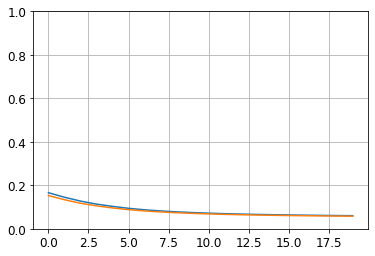

In [606]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [607]:
y_pred

array([[0.2738555],
       [0.       ],
       [0.       ],
       ...,
       [0.       ],
       [0.       ],
       [0.       ]], dtype=float32)

In [608]:
X_new = X_test
model.predict(X_new)

array([[0.1146614 ],
       [0.14260167],
       [0.23192734],
       ...,
       [0.19546595],
       [0.00982887],
       [0.03583341]], dtype=float32)

In [609]:
model.predict(X_test).max()

0.4739007

In [610]:
model.predict(X_test).min()

0.0098288655

In [611]:
y.max()

1.0

In [612]:
y.min()

0.0

In [613]:
model.predict(X_new)

array([[0.1146614 ],
       [0.14260167],
       [0.23192734],
       ...,
       [0.19546595],
       [0.00982887],
       [0.03583341]], dtype=float32)

In [614]:
model.predict(X_new).max()

0.4739007

In [615]:
model.predict(X_new).min()

0.0098288655

In [616]:
res=model.predict(df2019.iloc[:,-17:])

In [617]:
res.min()

0.0

In [618]:
res.max()

0.9997553

In [619]:
res

array([[0.99974465],
       [0.99974465],
       [0.99974465],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]], dtype=float32)